In [178]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# 1 - Data preparation

## 1.1 - Read and shuffle data

In [179]:
df = pd.read_csv('vegemite.csv')

df = df.sample(n=len(df)).reset_index(drop=True)

df.to_csv('vegemite_shuffled.csv', index=False)

df.shape

(15237, 47)

## 1.2 - Create training set with 1002 data points

In [180]:
df = pd.read_csv('vegemite_shuffled.csv')

df_train, df_real_test = train_test_split(df, test_size=1000, stratify=df['Class'], random_state=42)

print(f"Number of rows in the test/validation set: {df_real_test.shape[0]}")
print(f"Number of rows in the training set: {df_train.shape[0]}")

df_real_test.to_csv('vegemite_realtime_test.csv', index=False)

Number of rows in the test/validation set: 1000
Number of rows in the training set: 14237


## 1.3 - Remove columns with constants

In [181]:
constant_columns = [col for col in df_train.columns if df_train[col].nunique() == 1]

# Remove those columns
df_train = df_train.drop(columns=constant_columns)

print("Columns removed:", constant_columns)

Columns removed: ['TFE Steam temperature SP', 'TFE Product out temperature']


In [182]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14237 entries, 8097 to 1785
Data columns (total 45 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   FFTE Feed tank level SP        14237 non-null  float64
 1   FFTE Production solids SP      14237 non-null  float64
 2   FFTE Steam pressure SP         14237 non-null  float64
 3   TFE Out flow SP                14237 non-null  float64
 4   TFE Production solids SP       14237 non-null  float64
 5   TFE Vacuum pressure SP         14237 non-null  float64
 6   TFE Steam pressure SP          14237 non-null  float64
 7   FFTE Feed flow SP              14237 non-null  float64
 8   FFTE Out steam temp SP         14237 non-null  float64
 9   Extract tank Level             14237 non-null  float64
 10  Extract tank Out flow PV       14237 non-null  float64
 11  FFTE Discharge density         14237 non-null  float64
 12  FFTE Discharge solids          14237 non-null  fl

In [183]:
# Define the threshold for "few" unique values (e.g., 10 or fewer)
threshold = 10

# Identify integer columns with few unique values
cols_to_convert = [col for col in df_train.columns if col != 'Class' and df_train[col].nunique() <= threshold]

cols_to_convert  

['FFTE Feed tank level SP',
 'FFTE Pump 1',
 'FFTE Pump 1 - 2',
 'FFTE Pump 2',
 'TFE Motor speed']

In [184]:
label_encoders = {}

for col in cols_to_convert:
    le = LabelEncoder()
    df_train[col] = le.fit_transform(df_train[col])
    label_encoders[col] = le

df_train.to_csv('vegemite_converted.csv', index = False)

## 1.4 - Check class distribution

In [185]:
class_distribution = df_train['Class'].value_counts()

print("Class Distribution:")
print(class_distribution)

Class Distribution:
Class
2    7053
1    4716
0    2468
Name: count, dtype: int64


In [186]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks
from collections import Counter

X = df_train.drop('Class', axis=1)
y = df_train['Class']

print(f"Initial class distribution:\n{Counter(y)}")

smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)

tomek_links = TomekLinks()
X_balanced, y_balanced = tomek_links.fit_resample(X_smote, y_smote)

print(f"Class distribution after SMOTE and Tomek Links:\n{Counter(y_balanced)}")

df_train = pd.concat([pd.DataFrame(X_balanced, columns=X.columns), pd.Series(y_balanced, name='Class')], axis=1)

Initial class distribution:
Counter({2: 7053, 1: 4716, 0: 2468})
Class distribution after SMOTE and Tomek Links:
Counter({0: 7053, 1: 6945, 2: 6936})


## 1.5 - Data normalization

In [187]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
FFTE Feed tank level SP,20934.0,1.743336,0.662295,0.00,2.000000,2.000000,2.000000,2.00
FFTE Production solids SP,20934.0,41.767079,1.118527,39.00,40.740000,41.994441,43.000000,43.00
FFTE Steam pressure SP,20934.0,118.160987,16.262172,60.00,106.840729,120.000000,128.867084,225.00
TFE Out flow SP,20934.0,2404.477048,386.997798,1687.18,2066.670000,2240.020000,2846.510000,3012.56
TFE Production solids SP,20934.0,62.561346,14.333828,0.00,62.000000,65.000000,70.000000,98.00
TFE Vacuum pressure SP,20934.0,-66.038705,13.296716,-80.00,-78.560000,-69.910443,-55.541809,-36.37
TFE Steam pressure SP,20934.0,115.012033,24.560336,2.00,120.000000,120.000000,120.000000,135.00
FFTE Feed flow SP,20934.0,9979.952847,1358.557209,1100.00,9400.000000,9600.000000,10200.000000,18000.00
FFTE Out steam temp SP,20934.0,49.697298,1.954367,40.71,50.000000,50.000000,50.000000,54.38
Extract tank Level,20934.0,47.496055,18.322177,0.62,37.760000,52.100000,61.984119,75.62


In [188]:
from sklearn.preprocessing import MinMaxScaler

features = df_train.drop(columns=['Class'])
target = df_train['Class']

# Min-Max Scaling
scaler = MinMaxScaler()
min_max_scaled = pd.DataFrame(scaler.fit_transform(features), columns=features.columns)

# Combine the scaled features back with the target column
df_scaled = min_max_scaled.copy()
df_scaled['Class'] = target.values

df_train = df_scaled

# Display the first few rows of the scaled DataFrame
df_train.head()

,FFTE Feed tank level SP,FFTE Production solids SP,FFTE Steam pressure SP,TFE Out flow SP,TFE Production solids SP,TFE Vacuum pressure SP,TFE Steam pressure SP,FFTE Feed flow SP,FFTE Out steam temp SP,Extract tank Level,...,TFE Motor speed,TFE Out flow PV,TFE Production solids PV,TFE Production solids density,TFE Steam pressure PV,TFE Steam temperature,TFE Tank level,TFE Temperature,TFE Vacuum pressure PV,Class
0,1.0,0.435,0.393939,0.913300,0.433673,0.996333,0.887218,0.534320,0.670812,0.858267,...,1.0,0.102934,0.637083,0.750000,0.789452,0.378296,0.549535,0.18,0.065860,0
1,1.0,1.000,0.558364,0.984397,0.724490,0.059821,0.924812,0.556213,0.679590,0.913733,...,1.0,0.104385,0.713344,0.771739,0.740085,0.437155,0.863353,0.26,0.073777,2
2,1.0,0.375,0.341576,0.459581,0.642857,1.000000,0.924812,0.491124,0.679590,0.903200,...,1.0,0.155997,0.705818,0.728261,0.740085,0.803495,0.842738,0.72,0.534909,0
3,0.0,0.625,0.454545,0.265109,0.051020,0.687600,0.000000,1.000000,0.679590,0.761600,...,1.0,0.114396,0.491544,0.391304,0.709779,0.465052,0.508305,0.38,0.178450,1
4,1.0,0.625,0.333333,0.367653,0.755102,0.061884,0.887218,0.491124,0.688369,0.669733,...,1.0,0.083566,0.735609,0.826087,0.709779,0.389485,0.848392,0.38,0.178450,2


# 2 - Feature engineering

In [189]:
df_train.shape

(20934, 45)

## 2.1 - Correlation matrix analysis

In [190]:
corr = abs(df_train.corr()).T

corr

,FFTE Feed tank level SP,FFTE Production solids SP,FFTE Steam pressure SP,TFE Out flow SP,TFE Production solids SP,TFE Vacuum pressure SP,TFE Steam pressure SP,FFTE Feed flow SP,FFTE Out steam temp SP,Extract tank Level,...,TFE Motor speed,TFE Out flow PV,TFE Production solids PV,TFE Production solids density,TFE Steam pressure PV,TFE Steam temperature,TFE Tank level,TFE Temperature,TFE Vacuum pressure PV,Class
FFTE Feed tank level SP,1.000000,0.084068,0.234388,0.031210,0.300597,0.268456,0.540675,0.495750,0.040489,0.065143,...,0.274831,0.141531,0.264482,0.042116,0.206182,0.023344,0.084869,0.031764,0.267023,0.046503
FFTE Production solids SP,0.084068,1.000000,0.049992,0.547217,0.318649,0.197220,0.098080,0.264318,0.080927,0.030405,...,0.055240,0.007218,0.060728,0.052120,0.028587,0.046307,0.042049,0.052966,0.075321,0.133504
FFTE Steam pressure SP,0.234388,0.049992,1.000000,0.055882,0.041058,0.100543,0.307737,0.284599,0.082051,0.055243,...,0.163538,0.047278,0.175258,0.053859,0.129254,0.029844,0.100319,0.009654,0.157558,0.094441
TFE Out flow SP,0.031210,0.547217,0.055882,1.000000,0.289492,0.264316,0.063537,0.305983,0.011194,0.042129,...,0.084385,0.040358,0.006854,0.008118,0.028440,0.045214,0.073638,0.039443,0.075499,0.191707
TFE Production solids SP,0.300597,0.318649,0.041058,0.289492,1.000000,0.165307,0.368347,0.296727,0.026712,0.019879,...,0.008199,0.027580,0.063563,0.019640,0.043293,0.028845,0.044762,0.009443,0.016354,0.014294
TFE Vacuum pressure SP,0.268456,0.197220,0.100543,0.264316,0.165307,1.000000,0.240880,0.304880,0.018934,0.002784,...,0.112948,0.072895,0.095517,0.009020,0.107661,0.038250,0.001645,0.061011,0.141469,0.117041
TFE Steam pressure SP,0.540675,0.098080,0.307737,0.063537,0.368347,0.240880,1.000000,0.834754,0.047118,0.018813,...,0.316060,0.160020,0.341925,0.123791,0.258924,0.088068,0.073934,0.035827,0.279605,0.006830
FFTE Feed flow SP,0.495750,0.264318,0.284599,0.305983,0.296727,0.304880,0.834754,1.000000,0.048463,0.013336,...,0.301112,0.166706,0.305583,0.103064,0.244668,0.054559,0.078546,0.000804,0.281591,0.111584
FFTE Out steam temp SP,0.040489,0.080927,0.082051,0.011194,0.026712,0.018934,0.047118,0.048463,1.000000,0.019017,...,0.024738,0.044258,0.010373,0.058311,0.048737,0.030572,0.042310,0.030123,0.027302,0.054090
Extract tank Level,0.065143,0.030405,0.055243,0.042129,0.019879,0.002784,0.018813,0.013336,0.019017,1.000000,...,0.169046,0.123203,0.117971,0.075782,0.123886,0.046578,0.112970,0.005680,0.146271,0.054636


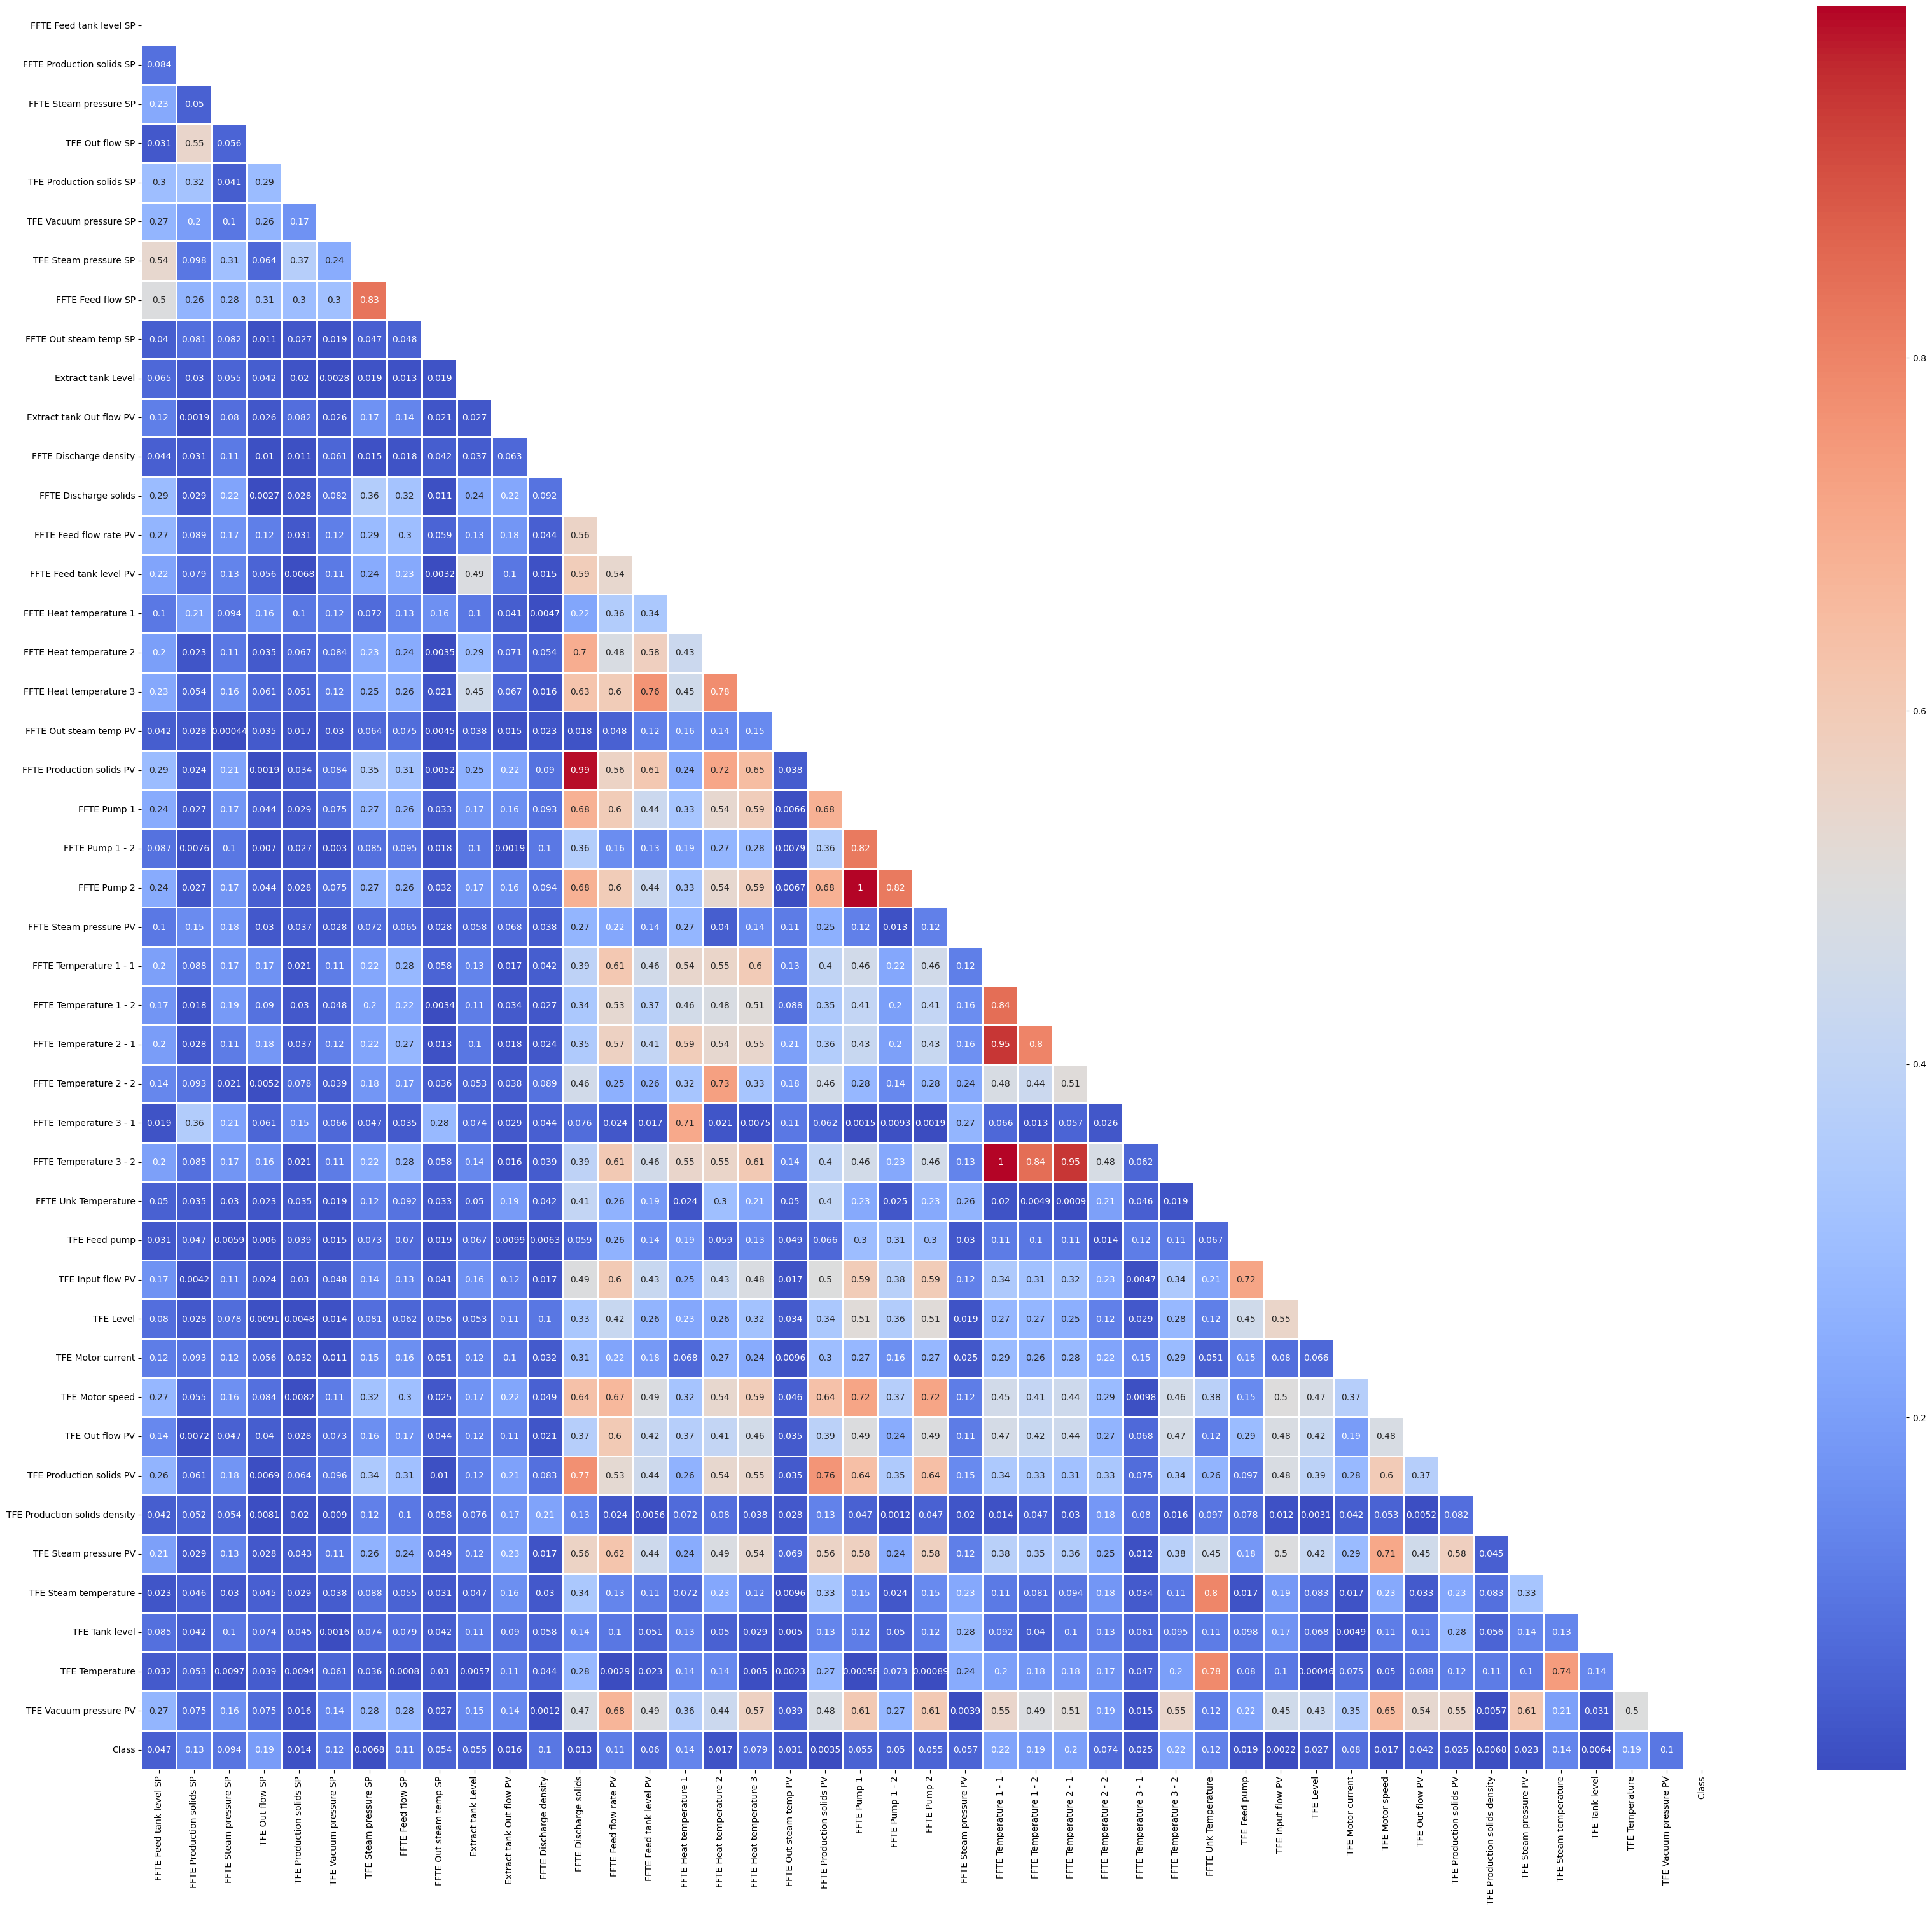

In [191]:
import seaborn as sns

corr = abs(df_train.corr())
lower_triangle = np.tril(corr, k=-1)
mask = lower_triangle == 0

plt.figure(figsize=(40, 36))
sns.heatmap(corr, center=0.5, cmap='coolwarm', annot=True, 
            xticklabels=corr.columns, yticklabels=corr.columns, 
            cbar=True, linewidths=1, mask=mask)
plt.show()

## 2.2 - Create composite features based on correlation

In [192]:
threshold = 0.1
corr_matrix = df_train.corr()

# Get the correlation of each feature with the target column
target_corr = corr_matrix['Class']

# # Find features with small positive correlations with the target column
small_positive_corr = target_corr[(target_corr > 0) & (target_corr <= threshold)].index.tolist()

# Filter the correlation matrix to include only the small positive correlations
filtered_corr_matrix = corr_matrix.loc[small_positive_corr, small_positive_corr]

pairs = []

for i, feature in enumerate(small_positive_corr):
    for other_feature in small_positive_corr[i+1:]:
        if 0 < filtered_corr_matrix.loc[feature, other_feature] <= threshold:
            pairs.append((feature, other_feature))

len(small_positive_corr), len(pairs)

(15, 16)

In [193]:
for pair in pairs:
    feature1, feature2 = pair
    new_feature_name = f'{feature1}_{feature2}'
    df_train[new_feature_name] = df_train[feature1] + df_train[feature2]

df_train.to_csv('vegemite_composite.csv', index=False)

df_train.columns

Index(['FFTE Feed tank level SP', 'FFTE Production solids SP',
       'FFTE Steam pressure SP', 'TFE Out flow SP', 'TFE Production solids SP',
       'TFE Vacuum pressure SP', 'TFE Steam pressure SP', 'FFTE Feed flow SP',
       'FFTE Out steam temp SP', 'Extract tank Level',
       'Extract tank Out flow PV', 'FFTE Discharge density',
       'FFTE Discharge solids', 'FFTE Feed flow rate PV',
       'FFTE Feed tank level PV', 'FFTE Heat temperature 1',
       'FFTE Heat temperature 2', 'FFTE Heat temperature 3',
       'FFTE Out steam temp PV', 'FFTE Production solids PV', 'FFTE Pump 1',
       'FFTE Pump 1 - 2', 'FFTE Pump 2', 'FFTE Steam pressure PV',
       'FFTE Temperature 1 - 1', 'FFTE Temperature 1 - 2',
       'FFTE Temperature 2 - 1', 'FFTE Temperature 2 - 2',
       'FFTE Temperature 3 - 1', 'FFTE Temperature 3 - 2',
       'FFTE Unk Temperature', 'TFE Feed pump', 'TFE Input flow PV',
       'TFE Level', 'TFE Motor current', 'TFE Motor speed', 'TFE Out flow PV',
       'TFE P

In [194]:
cols =[col for col in df_train.columns]
len(cols)

61

## 2.3 - Feature Selection

In [195]:
df = pd.read_csv('vegemite_composite.csv')

df.head()

,FFTE Feed tank level SP,FFTE Production solids SP,FFTE Steam pressure SP,TFE Out flow SP,TFE Production solids SP,TFE Vacuum pressure SP,TFE Steam pressure SP,FFTE Feed flow SP,FFTE Out steam temp SP,Extract tank Level,...,TFE Production solids SP_FFTE Production solids PV,TFE Production solids SP_FFTE Steam pressure PV,TFE Production solids SP_FFTE Temperature 2 - 2,TFE Production solids SP_TFE Production solids PV,TFE Production solids SP_TFE Steam pressure PV,Extract tank Out flow PV_FFTE Steam pressure PV,Extract tank Out flow PV_TFE Feed pump,FFTE Steam pressure PV_TFE Level,FFTE Temperature 2 - 2_TFE Feed pump,TFE Motor current_TFE Tank level
0,1.0,0.435,0.393939,0.913300,0.433673,0.996333,0.887218,0.534320,0.670812,0.858267,...,1.178154,0.875815,0.981960,1.070756,1.223125,0.452462,0.220320,0.899883,0.758287,0.956342
1,1.0,1.000,0.558364,0.984397,0.724490,0.059821,0.924812,0.556213,0.679590,0.913733,...,1.402402,1.200169,1.334666,1.437833,1.464575,0.485250,0.209571,0.894123,0.810177,1.262400
2,1.0,0.375,0.341576,0.459581,0.642857,1.000000,0.924812,0.491124,0.679590,0.903200,...,1.378168,1.063860,1.222919,1.348676,1.382942,0.424998,0.213995,0.825229,0.790062,1.288483
3,0.0,0.625,0.454545,0.265109,0.051020,0.687600,0.000000,1.000000,0.679590,0.761600,...,0.665421,0.450119,0.562547,0.542564,0.760799,0.741504,0.570605,0.877673,0.739726,0.888972
4,1.0,0.625,0.333333,0.367653,0.755102,0.061884,0.887218,0.491124,0.688369,0.669733,...,1.374597,1.216936,1.196847,1.490711,1.464881,0.568201,0.316367,0.884721,0.651745,1.295499


In [196]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop(columns=['Class'])
y = df['Class']

#Standardize the features
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Use the SelectKBest class to extract the top 10 features
selector = SelectKBest(score_func=f_classif, k=10)
X_new = selector.fit_transform(X, y)

# print the selected features
selected_features = X.columns[selector.get_support()]
print(selected_features)

#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=42)

#Print the shape of the training and testing sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

Index(['FFTE Production solids SP', 'TFE Out flow SP',
       'FFTE Heat temperature 1', 'FFTE Temperature 1 - 1',
       'FFTE Temperature 1 - 2', 'FFTE Temperature 2 - 1',
       'FFTE Temperature 3 - 2', 'FFTE Unk Temperature',
       'TFE Steam temperature', 'TFE Temperature'],
      dtype='object')


((14653, 10), (6281, 10), (14653,), (6281,))

## 2.4 - Model training

In [197]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split


# Models initialization
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier()
}

# Train and evaluate each model
results = {}
for model_name, model in models.items():
    print(f"Training {model_name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Save evaluation metrics
    results[model_name] = {
        'classification_report': classification_report(y_test, y_pred),
        'confusion_matrix': confusion_matrix(y_test, y_pred)
    }


Training Logistic Regression...
Training Random Forest...
Training Decision Tree...
Training SVM...
Training KNN...


### Display Classification report

In [198]:
# Display classification report
for model_name, metrics in results.items():
    print(f"\n{model_name} Classification Report:\n")
    print(metrics['classification_report'])


Logistic Regression Classification Report:

              precision    recall  f1-score   support

           0       0.48      0.59      0.53      2152
           1       0.47      0.27      0.34      2132
           2       0.49      0.60      0.54      1997

    accuracy                           0.48      6281
   macro avg       0.48      0.49      0.47      6281
weighted avg       0.48      0.48      0.47      6281


Random Forest Classification Report:

              precision    recall  f1-score   support

           0       0.98      0.97      0.98      2152
           1       0.97      0.96      0.96      2132
           2       0.97      0.98      0.97      1997

    accuracy                           0.97      6281
   macro avg       0.97      0.97      0.97      6281
weighted avg       0.97      0.97      0.97      6281


Decision Tree Classification Report:

              precision    recall  f1-score   support

           0       0.95      0.94      0.95      2152
      

## Display confusion matrix

In [199]:
# Display confusion matrix
for model_name, metrics in results.items():
    print(f"\n{model_name} Confusion Matrix:\n")
    print(metrics['confusion_matrix'])


Logistic Regression Confusion Matrix:

[[1264  309  579]
 [ 902  568  662]
 [ 465  328 1204]]

Random Forest Confusion Matrix:

[[2096   38   18]
 [  40 2046   46]
 [   5   32 1960]]

Decision Tree Confusion Matrix:

[[2033   86   33]
 [  82 1970   80]
 [  16   60 1921]]

SVM Confusion Matrix:

[[1725  246  181]
 [ 492 1170  470]
 [ 364  293 1340]]

KNN Confusion Matrix:

[[2022   80   50]
 [ 130 1879  123]
 [ 109  166 1722]]


### Visualize confusion matrix

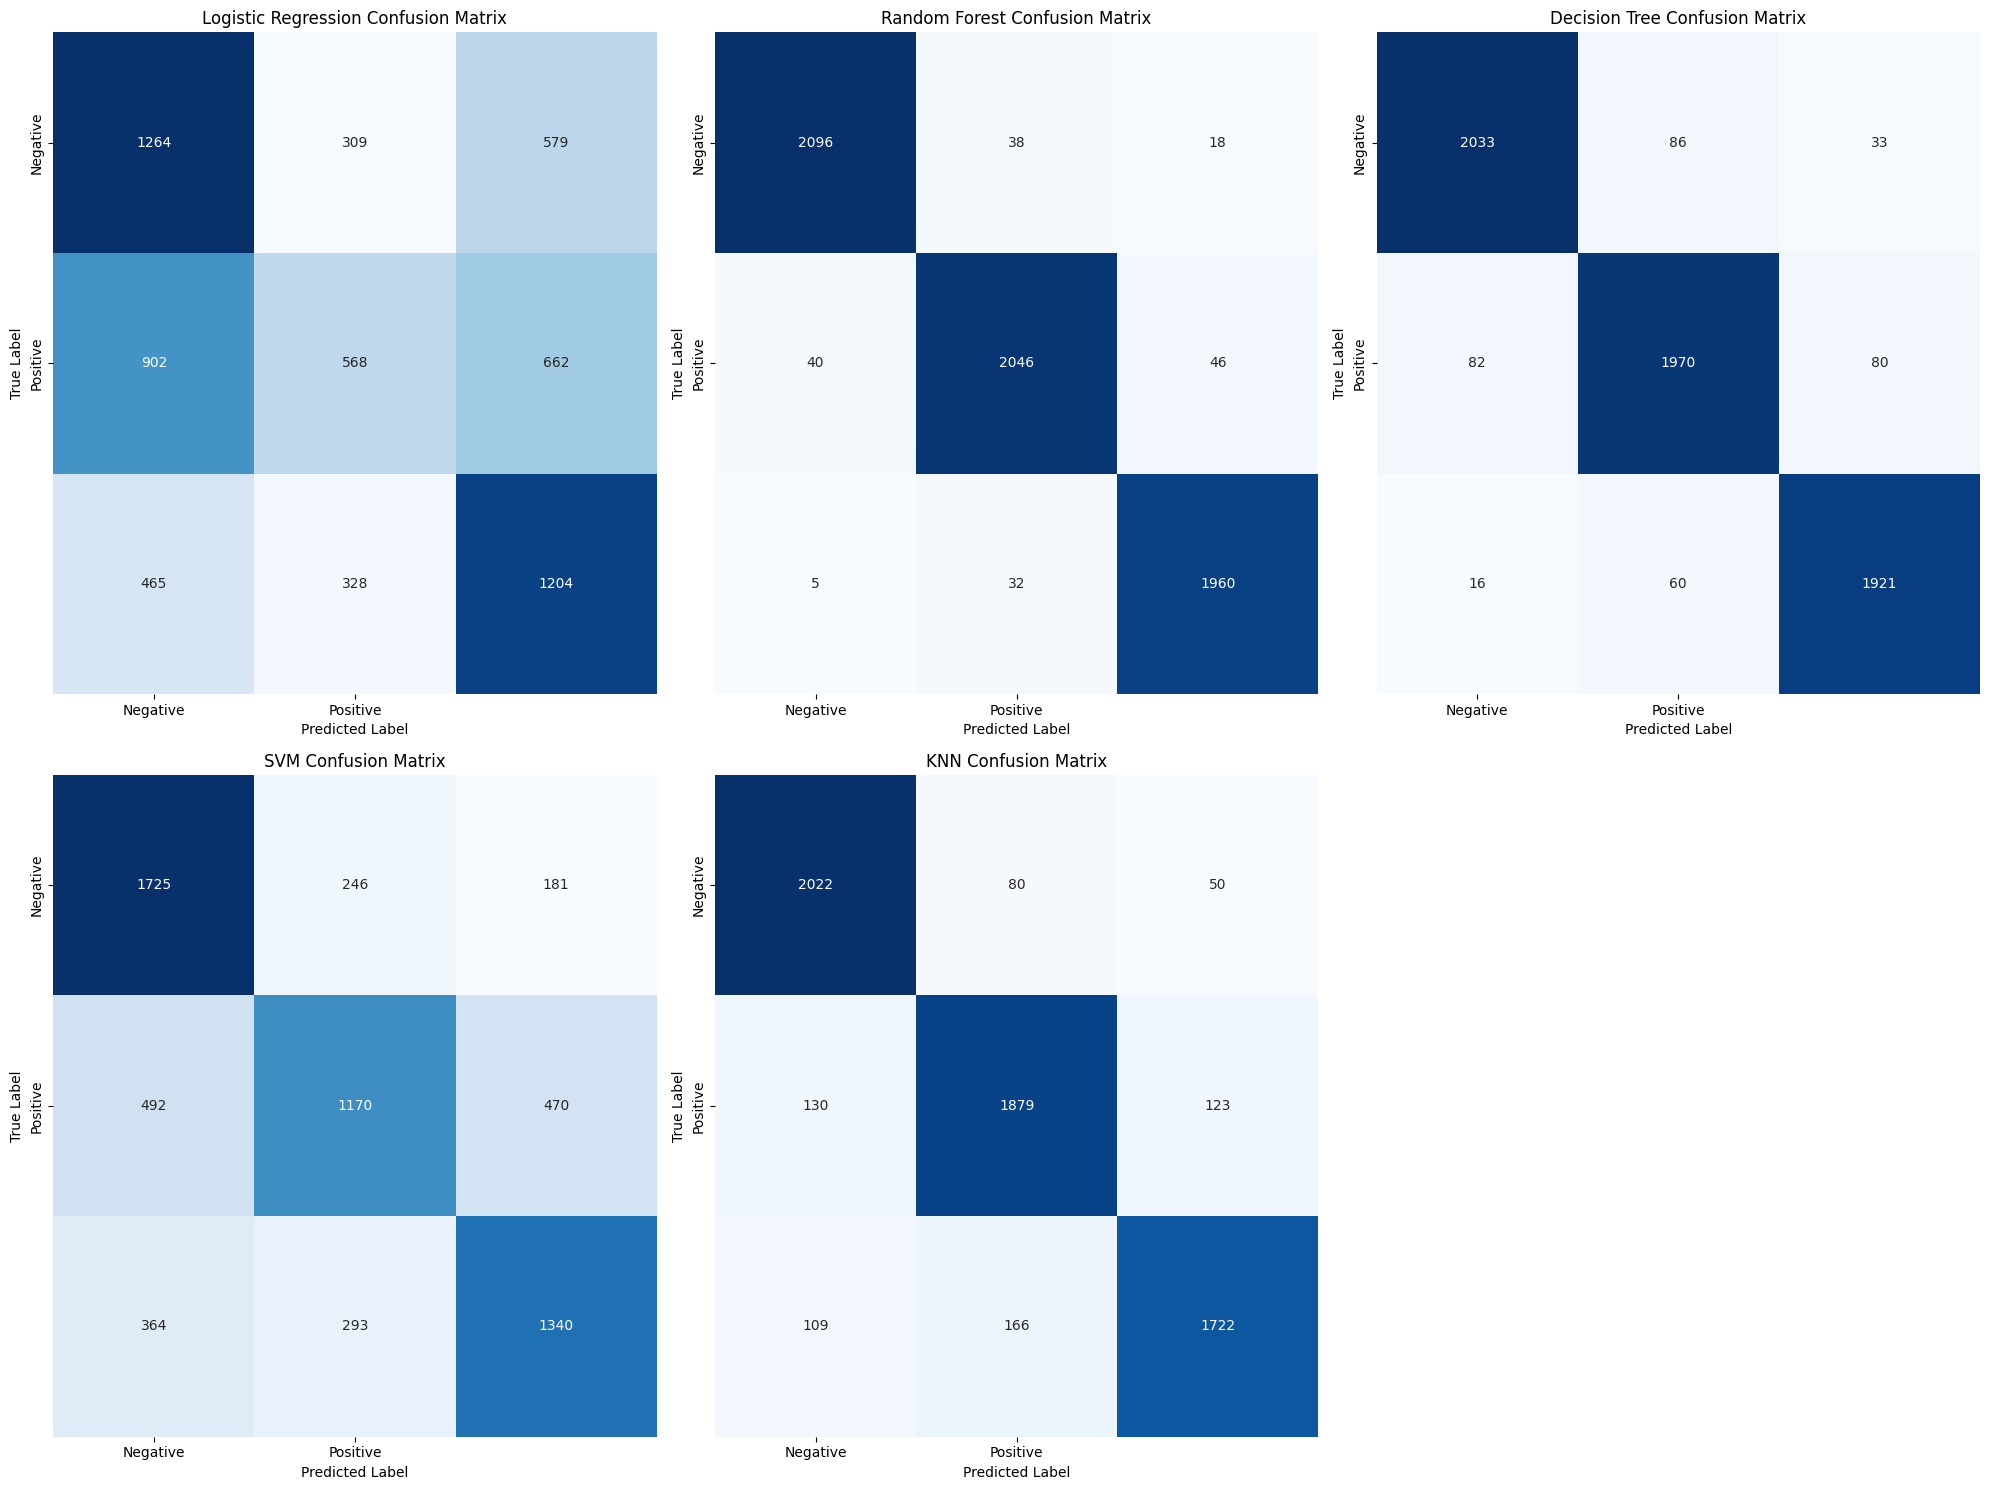

In [200]:
# Visualize the confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 15))
for i, (model_name, metrics) in enumerate(results.items()):
    plt.subplot(2, 3, i+1)
    sns.heatmap(metrics['confusion_matrix'], annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
    plt.title(f'{model_name} Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')

plt.tight_layout()
plt.show()


### Save model

In [177]:
import pickle

filename = 'bestmodel.pkl'
pickle.dump(models['Random Forest'], open(filename, 'wb'))

for model_name, model in models.items():
    filename = f'{model_name}_model.pkl'
    pickle.dump(model, open(filename, 'wb'))

# 3 - ML to AI

In [ ]:
test_df = pd.read_csv('vegemite_realtime_test.csv')

X_test = test_df.drop(columns=['Class'])
y_test = test_df['Class']

In [ ]:
# Remove constant columns in the test set
X_test = X_test.drop(columns=constant_columns, errors='ignore')

# Convert integer columns with few unique values
for col in cols_to_convert:
    le = label_encoders[col]
    X_test[col] = le.transform(X_test[col])

# Create composite features
for pair in pairs:
    feature1, feature2 = pair
    new_feature_name = f'{feature1}_{feature2}'
    X_test[new_feature_name] = X_test[feature1] + X_test[feature2]

# Scale the features
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

# Select the top 10 features
X_test = X_test[selected_features]

In [ ]:
model = pickle.load(open('bestmodel.pkl', 'rb'))

#Iteratively convert columns in each row in the format of training feature 
for col in cols_to_convert:
    test_df[col] = label_encoders[col].transform(test_df[col])

# Min-Max Scaling
test_features = test_df.drop(columns=['Class'])

# Standardize the features
scaler = StandardScaler()
test_features = pd.DataFrame(scaler.fit_transform(test_features), columns=test_features.columns)

# Select the top 10 features
test_features = test_features[selected_features]

X_test = test_df.drop(columns=['Class'])

#  4 - Develop rules from ML model